<a href="https://colab.research.google.com/github/IndraAlFauzan/matlab/blob/main/Smoverse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from tabulate import tabulate
# Load the uploaded Excel file
file_path = '/content/sample_data/Jawaban Pretest dan Posttest.xlsx'
data = pd.read_excel(file_path, sheet_name=None)  # Load all sheets

# Concatenate the DataFrames from different sheets
df = pd.concat(data.values(), ignore_index=True)

# Menambahkan kolom Peningkatan
df['Peningkatan'] = df['Postest'] - df['Pretest']

# Cetak data untuk memastikan semuanya benar
print(tabulate(df, headers='keys', tablefmt='fancy_grid'))

# Memisahkan data berdasarkan versi game
pre_test_A = df[df["Game versi apa?"] == "Game Versi A"]["Pretest"]
post_test_A = df[df["Game versi apa?"] == "Game Versi A"]["Postest"]

pre_test_B = df[df["Game versi apa?"] == "Game Versi B"]["Pretest"]
post_test_B = df[df["Game versi apa?"] == "Game Versi B"]["Postest"]


╒════╤══════════════════════════════════════╤═══════════════════╤═══════════╤═══════════╤═══════════════╕
│    │ Nama                                 │ Game versi apa?   │   Pretest │   Postest │   Peningkatan │
╞════╪══════════════════════════════════════╪═══════════════════╪═══════════╪═══════════╪═══════════════╡
│  0 │ Adam Gunawan                         │ Game Versi A      │   73.3333 │   66.6667 │      -6.66667 │
├────┼──────────────────────────────────────┼───────────────────┼───────────┼───────────┼───────────────┤
│  1 │ Akmal Afriansyah                     │ Game Versi A      │   60      │   53.3333 │      -6.66667 │
├────┼──────────────────────────────────────┼───────────────────┼───────────┼───────────┼───────────────┤
│  2 │ ANANDA REZKY RAMADHAN                │ Game Versi A      │   93.3333 │   80      │     -13.3333  │
├────┼──────────────────────────────────────┼───────────────────┼───────────┼───────────┼───────────────┤
│  3 │ Anisa Agustina                       │ 

In [ ]:
# Pemeriksaan Normalitas dengan Shapiro-Wilk Test
shapiro_pre_A = stats.shapiro(pre_test_A)
shapiro_post_A = stats.shapiro(post_test_A)
shapiro_pre_B = stats.shapiro(pre_test_B)
shapiro_post_B = stats.shapiro(post_test_B)

# Menentukan apakah data terdistribusi normal
normality_results = {
    "Pre Test A": shapiro_pre_A.pvalue > 0.05,
    "Post Test A": shapiro_post_A.pvalue > 0.05,
    "Pre Test B": shapiro_pre_B.pvalue > 0.05,
    "Post Test B": shapiro_post_B.pvalue > 0.05,
}

print("Normality Check:")
for test, is_normal in normality_results.items():
    p_value = shapiro_pre_A.pvalue if "Pre Test A" in test else (
        shapiro_post_A.pvalue if "Post Test A" in test else (
            shapiro_pre_B.pvalue if "Pre Test B" in test else shapiro_post_B.pvalue))
    print(f"{test}: {'Normal' if is_normal else 'Not Normal'} (p-value = {p_value:.3f})")

# Menentukan uji statistik berdasarkan hasil normalitas
def choose_test(pre_test, post_test, is_normal_pre, is_normal_post):
    if is_normal_pre and is_normal_post:
        # Paired Samples T-Test
        t_stat, p_value = stats.ttest_rel(pre_test, post_test)
        test_name = "Paired Samples T-Test"
    else:
        # Wilcoxon Signed-Rank Test dengan normal approximation
        t_stat, p_value = stats.wilcoxon(pre_test, post_test, correction=True)
        test_name = "Wilcoxon Signed-Rank Test "
    return t_stat, p_value, test_name

t_stat_A, p_value_A, test_A = choose_test(pre_test_A, post_test_A, normality_results["Pre Test A"], normality_results["Post Test A"])
t_stat_B, p_value_B, test_B = choose_test(pre_test_B, post_test_B, normality_results["Pre Test B"], normality_results["Post Test B"])

# Membandingkan peningkatan antara Game A dan Game B
increase_A = post_test_A.values - pre_test_A.values
increase_B = post_test_B.values - pre_test_B.values

# Uji normalitas untuk peningkatan
# Menggunakan metode Shapiro
shapiro_increase_A = stats.shapiro(increase_A)
shapiro_increase_B = stats.shapiro(increase_B)

normality_increase_results = {
    "Increase A": shapiro_increase_A.pvalue > 0.05,
    "Increase B": shapiro_increase_B.pvalue > 0.05,
}

print("\nNormality Check for Increase:")
print(f"Increase A: {'Normal' if normality_increase_results['Increase A'] else 'Not Normal'} (p-value = {shapiro_increase_A.pvalue:.5f})")
print(f"Increase B: {'Normal' if normality_increase_results['Increase B'] else 'Not Normal'} (p-value = {shapiro_increase_B.pvalue:.3f})")

# Melakukan uji statistik untuk perbandingan peningkatan
if normality_increase_results["Increase A"] and normality_increase_results["Increase B"]: # Jika Normal
    # Menggunakan T-Test
    t_stat_compare, p_value_compare = stats.ttest_ind(increase_A, increase_B)
    test_compare = "Independent Samples T-Test"
else:
    # Menggunakan Mann-Whitney Test
    t_stat_compare, p_value_compare = stats.mannwhitneyu(increase_A, increase_B)
    test_compare = "Mann-Whitney U Test"

# Menampilkan hasil uji statistik
print("\nTest Results:")
print(f"\nTest A: {test_A} (statistic = {t_stat_A:.3f}, p-value = {p_value_A:.3f})")
print(f"Test B: {test_B} (statistic = {t_stat_B:.3f}, p-value = {p_value_B:.3f})")
print(f"Comparison Test: {test_compare} (statistic = {t_stat_compare:.3f}, p-value = {p_value_compare:.3f})")

Normality Check:
Pre Test A: Not Normal (p-value = 0.009)
Post Test A: Not Normal (p-value = 0.001)
Pre Test B: Not Normal (p-value = 0.048)
Post Test B: Not Normal (p-value = 0.000)

Normality Check for Increase:
Increase A: Not Normal (p-value = 0.000)
Increase B: Normal (p-value = 0.246)

Test Results:

Test A: Wilcoxon Signed-Rank Test  (statistic = 265.500, p-value = 0.289)
Test B: Wilcoxon Signed-Rank Test  (statistic = 123.500, p-value = 0.001)
Comparison Test: Mann-Whitney U Test (statistic = 746.500, p-value = 0.031)


╒═══════════════════╤═════════════╤═══════════╤═══════════════════════════╕
│ Comparison        │   Statistic │   P-Value │ Test Used                 │
╞═══════════════════╪═════════════╪═══════════╪═══════════════════════════╡
│ Game A            │     265.500 │     0.289 │ Wilcoxon Signed-Rank Test │
├───────────────────┼─────────────┼───────────┼───────────────────────────┤
│ Game B            │     123.500 │     0.001 │ Wilcoxon Signed-Rank Test │
├───────────────────┼─────────────┼───────────┼───────────────────────────┤
│ Comparison A vs B │     746.500 │     0.031 │ Mann-Whitney U Test       │
╘═══════════════════╧═════════════╧═══════════╧═══════════════════════════╛


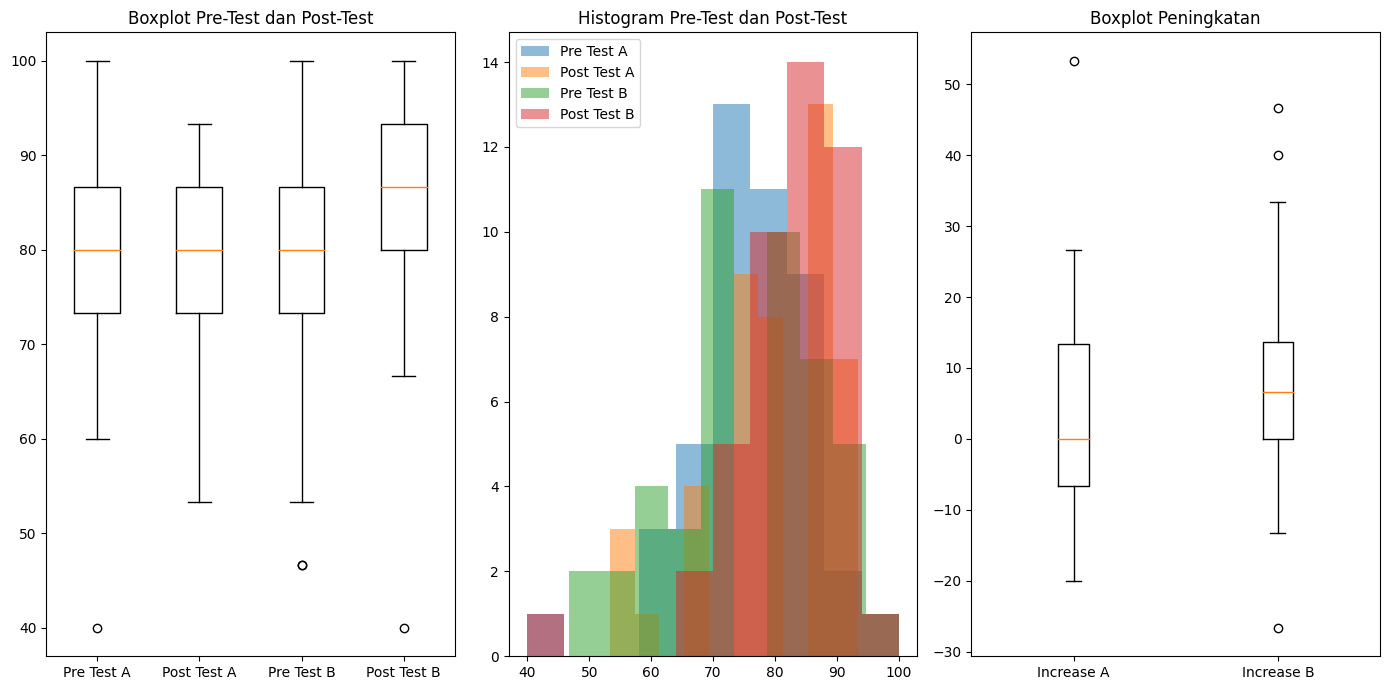

In [ ]:
# Menyusun hasil ke dalam tabel
results = [
    ["Game A", t_stat_A, p_value_A, test_A],
    ["Game B", t_stat_B, p_value_B, test_B],
    ["Comparison A vs B", t_stat_compare, p_value_compare, test_compare]
]

headers = ["Comparison", "Statistic", "P-Value", "Test Used"]

# Mencetak tabel menggunakan tabulate
print(tabulate(results, headers=headers, floatfmt=".3f", tablefmt="fancy_grid"))

# Visualisasi Data
plt.figure(figsize=(14, 7))

# Boxplot for Pre-Test and Post-Test
plt.subplot(1, 3, 1)
plt.boxplot([pre_test_A, post_test_A, pre_test_B, post_test_B], labels=['Pre Test A', 'Post Test A', 'Pre Test B', 'Post Test B'])
plt.title('Boxplot Pre-Test dan Post-Test')

# Histogram for Pre-Test and Post-Test
plt.subplot(1, 3, 2)
plt.hist(pre_test_A, alpha=0.5, label='Pre Test A')
plt.hist(post_test_A, alpha=0.5, label='Post Test A')
plt.hist(pre_test_B, alpha=0.5, label='Pre Test B')
plt.hist(post_test_B, alpha=0.5, label='Post Test B')
plt.title('Histogram Pre-Test dan Post-Test')
plt.legend()

# Boxplot for Increases
plt.subplot(1, 3, 3)
plt.boxplot([increase_A, increase_B], labels=['Increase A', 'Increase B'])
plt.title('Boxplot Peningkatan')

plt.tight_layout()
plt.show()